In [2]:
#from google.colab import drive

#drive.mount('/content/drive')

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from datatable import f, fread, by, sum, ifelse

ModuleNotFoundError: No module named 'datatable'

# DATATABLE

In [2]:
frame = fread('/content/drive/MyDrive/datos.gz')

In [ ]:
frame.head(5)

   | numero_de_cliente  foto_mes  active_quarter  cliente_vip  internet  …  Visa_cade…  Visa_mpagominimo  clase_ternaria
-- + -----------------  --------  --------------  -----------  --------     ----------  ----------------  --------------
 0 |           4566109    201701               0            0         0  …          NA                 0  CONTINUA      
 1 |           4566109    201702               0            0         0  …          NA                 0  CONTINUA      
 2 |           4566109    201703               0            0         0  …          NA                 0  CONTINUA      
 3 |           4566109    201704               0            0         0  …          NA                 0  CONTINUA      
 4 |           4566109    201705               0            0         0  …          NA                 0  CONTINUA      

[5 rows x 156 columns]


,numero_de_cliente,foto_mes,active_quarter,cliente_vip,internet,cliente_edad,cliente_antiguedad,mrentabilidad,mrentabilidad_annual,mcomisiones,…,Visa_mconsumototal,Visa_cconsumos,Visa_cadelantosefectivo,Visa_mpagominimo,clase_ternaria
,▪▪▪▪,▪▪▪▪,▪,▪,▪,▪▪▪▪,▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪,,▪▪▪▪▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪
0,4566109,201701,0,0,0,74,8,0.47,2.63,0,…,NA,NA,NA,0,CONTINUA
1,4566109,201702,0,0,0,74,9,0.44,3.07,0,…,NA,NA,NA,0,CONTINUA
2,4566109,201703,0,0,0,74,10,0.53,3.61,0,…,NA,NA,NA,0,CONTINUA
3,4566109,201704,0,0,0,74,11,0.56,4.17,0,…,NA,NA,NA,0,CONTINUA
4,4566109,201705,0,0,0,74,12,0.6,4.78,0,…,NA,NA,NA,0,CONTINUA


## ganancia

In [ ]:
frame['ganancia'] = frame[:, ifelse(f.clase_ternaria == 'BAJA+2', 29250, 0)]
ganancias_por_mes = frame[:, sum(f.ganancia), by('foto_mes')]

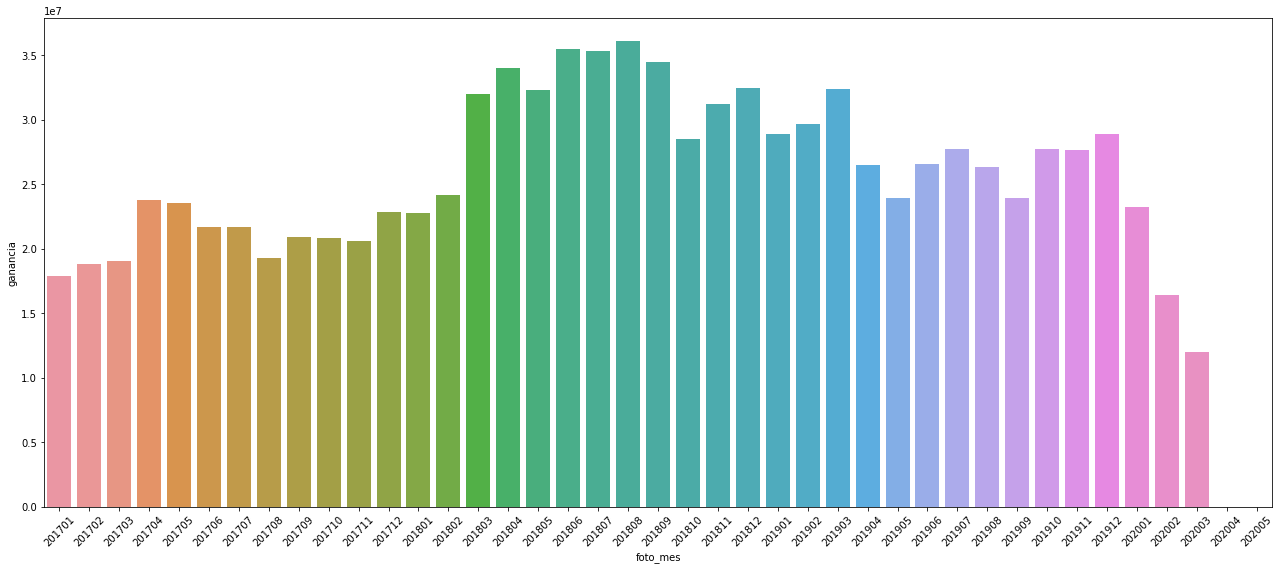

In [ ]:
plt.figure(figsize=(22, 9))
plt.xticks(rotation=45)

sns.barplot(x='foto_mes', y='ganancia', data=ganancias_por_mes.to_pandas())

## cantidad

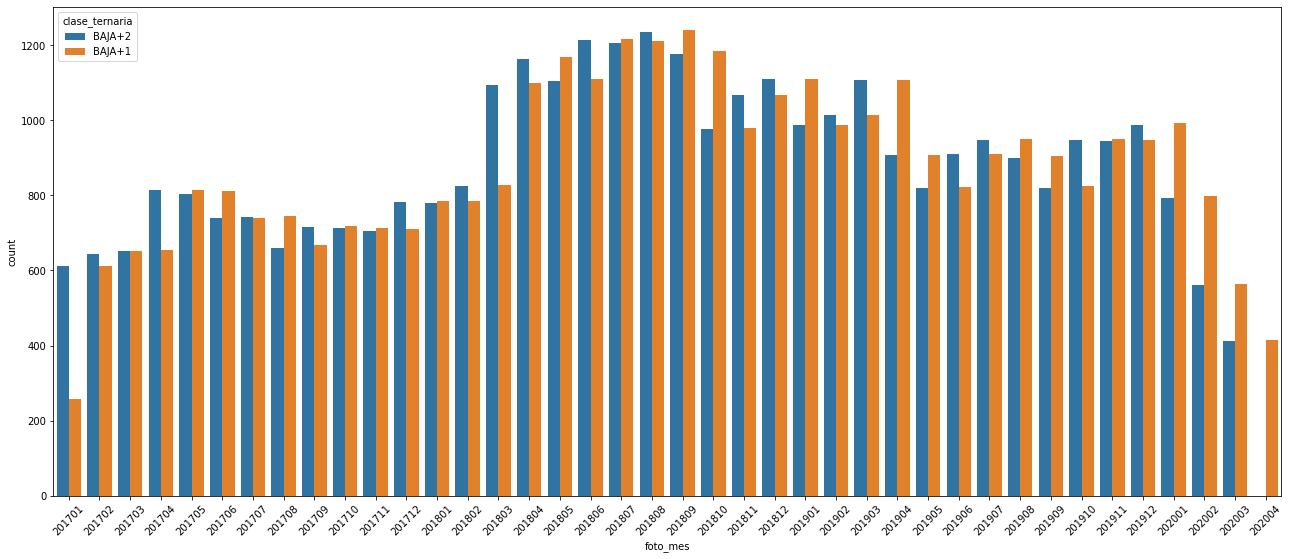

In [ ]:
plt.figure(figsize=(22, 9))
plt.xticks(rotation=45)

frame_baja = frame[(f.clase_ternaria == 'BAJA+1') | (f.clase_ternaria == 'BAJA+2'), :]

sns.countplot(x='foto_mes',
              hue='clase_ternaria', 
              data=frame_baja[:, ['foto_mes', 'clase_ternaria']].to_pandas())

## ctrx_quarter

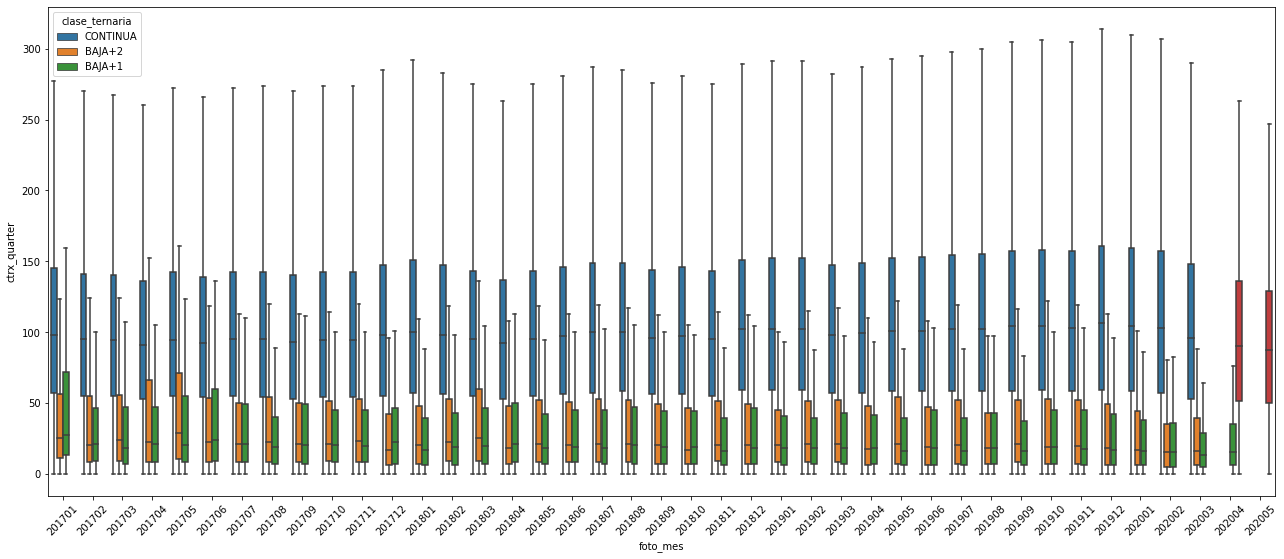

In [ ]:
plt.figure(figsize=(22, 9))
plt.xticks(rotation=45)

sns.boxplot(x="foto_mes", y="ctrx_quarter",
            hue="clase_ternaria",
            data=frame[:, ['foto_mes', 'ctrx_quarter', 'clase_ternaria']].to_pandas(), showfliers=False)

## mcuentas_saldo

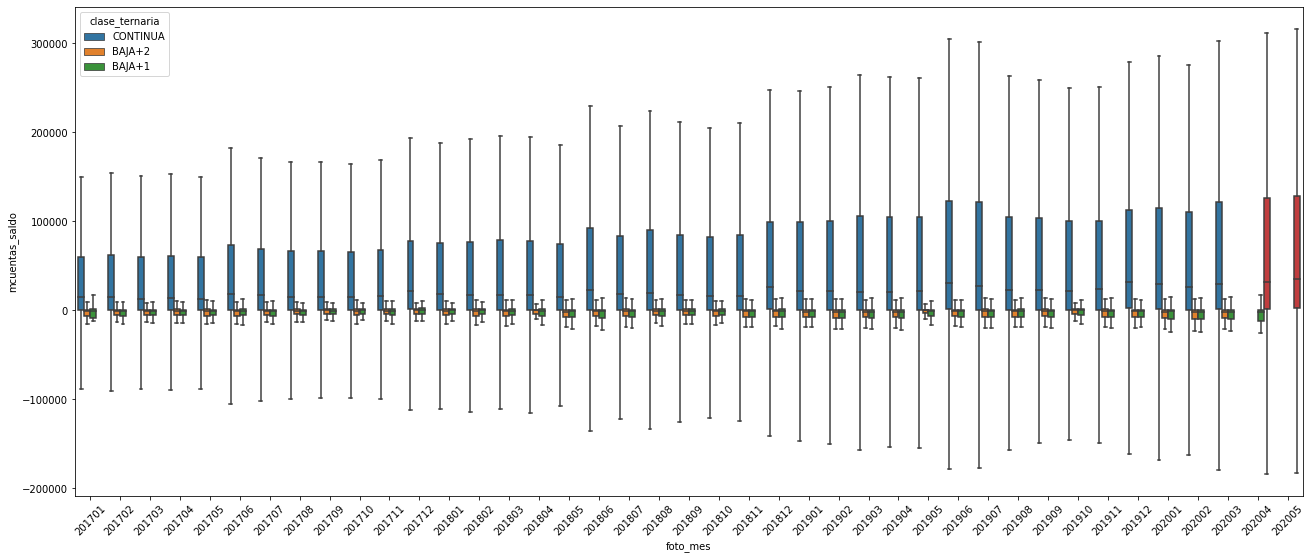

In [ ]:
plt.figure(figsize=(22, 9))
plt.xticks(rotation=45)

sns.boxplot(x="foto_mes", y="mcuentas_saldo",
            hue="clase_ternaria",
            data=frame[:, ['foto_mes', 'mcuentas_saldo', 'clase_ternaria']].to_pandas(), showfliers=False)

## mcaja_ahorro

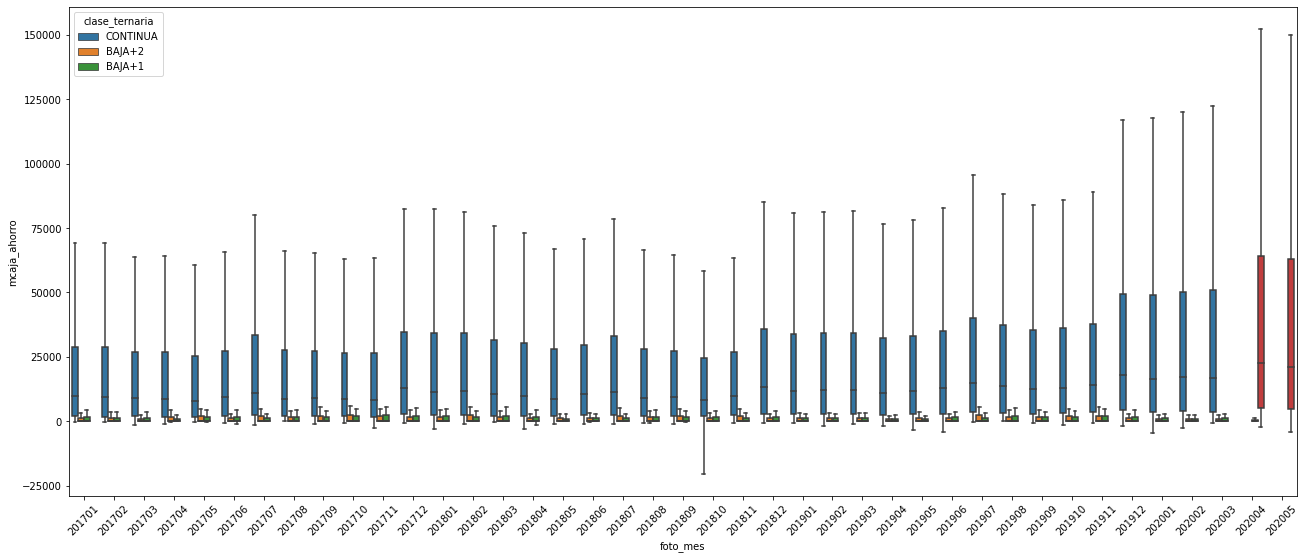

In [ ]:
plt.figure(figsize=(22, 9))
plt.xticks(rotation=45)

sns.boxplot(x="foto_mes", y="mcaja_ahorro",
            hue="clase_ternaria",
            data=frame[:, ['foto_mes', 'mcaja_ahorro', 'clase_ternaria']].to_pandas(), showfliers=False)

## mprestamos_personales

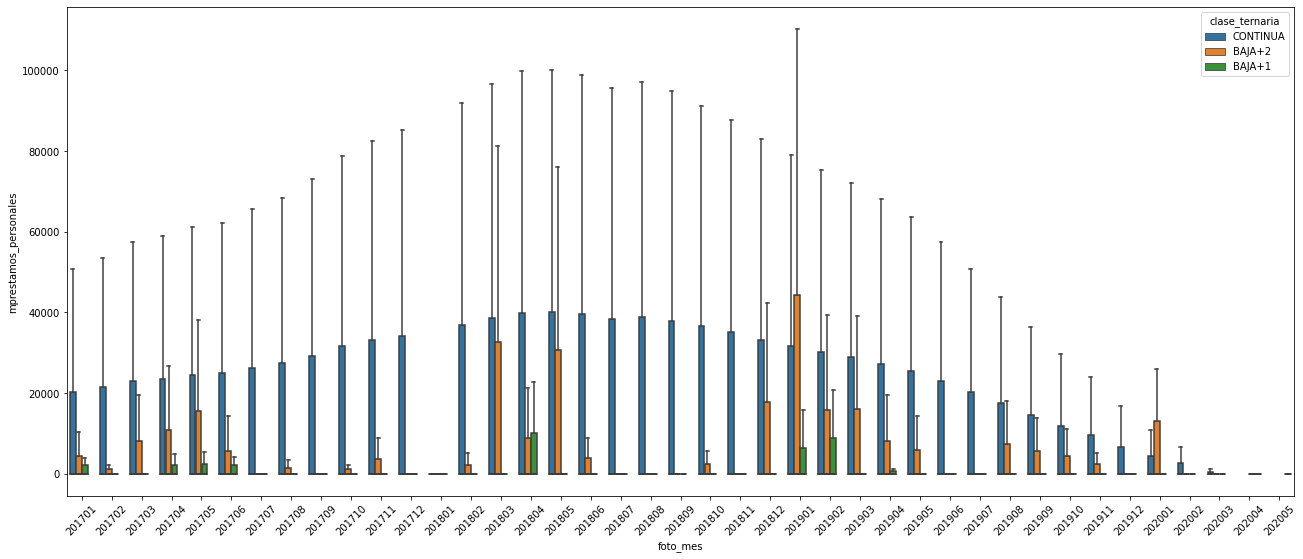

In [ ]:
plt.figure(figsize=(22, 9))
plt.xticks(rotation=45)

sns.boxplot(x="foto_mes", y="mprestamos_personales",
            hue="clase_ternaria",
            data=frame[:, ['foto_mes', 'mprestamos_personales', 'clase_ternaria']].to_pandas(), showfliers=False)

## cprestamos_personales

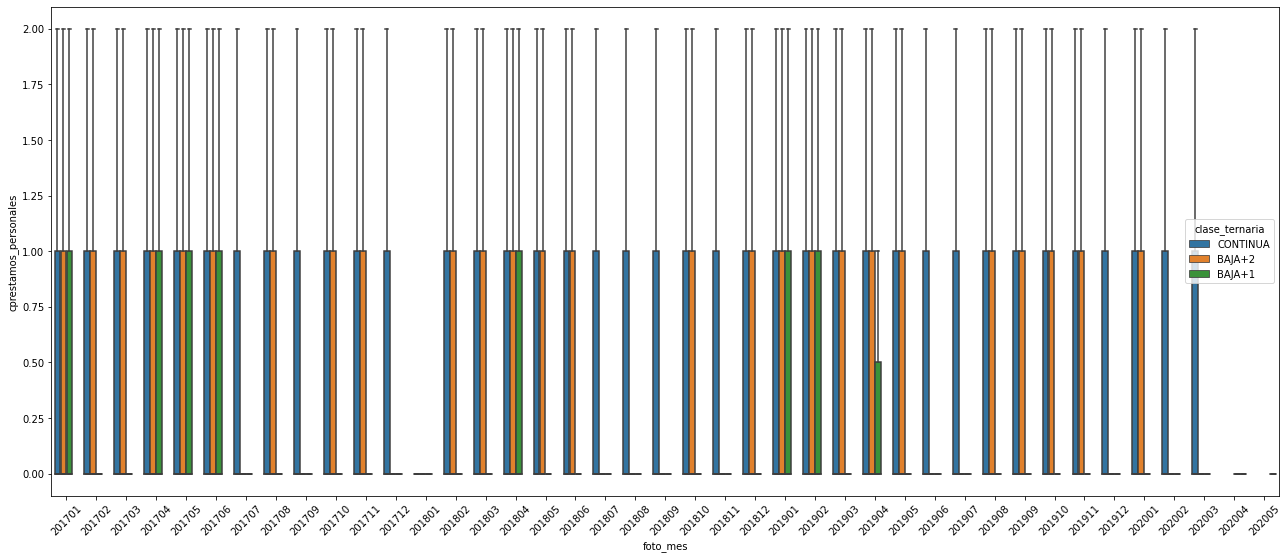

In [ ]:
plt.figure(figsize=(22, 9))
plt.xticks(rotation=45)

sns.boxplot(x="foto_mes", y="cprestamos_personales",
            hue="clase_ternaria",
            data=frame[:, ['foto_mes', 'cprestamos_personales', 'clase_ternaria']].to_pandas(), showfliers=False)

## internet

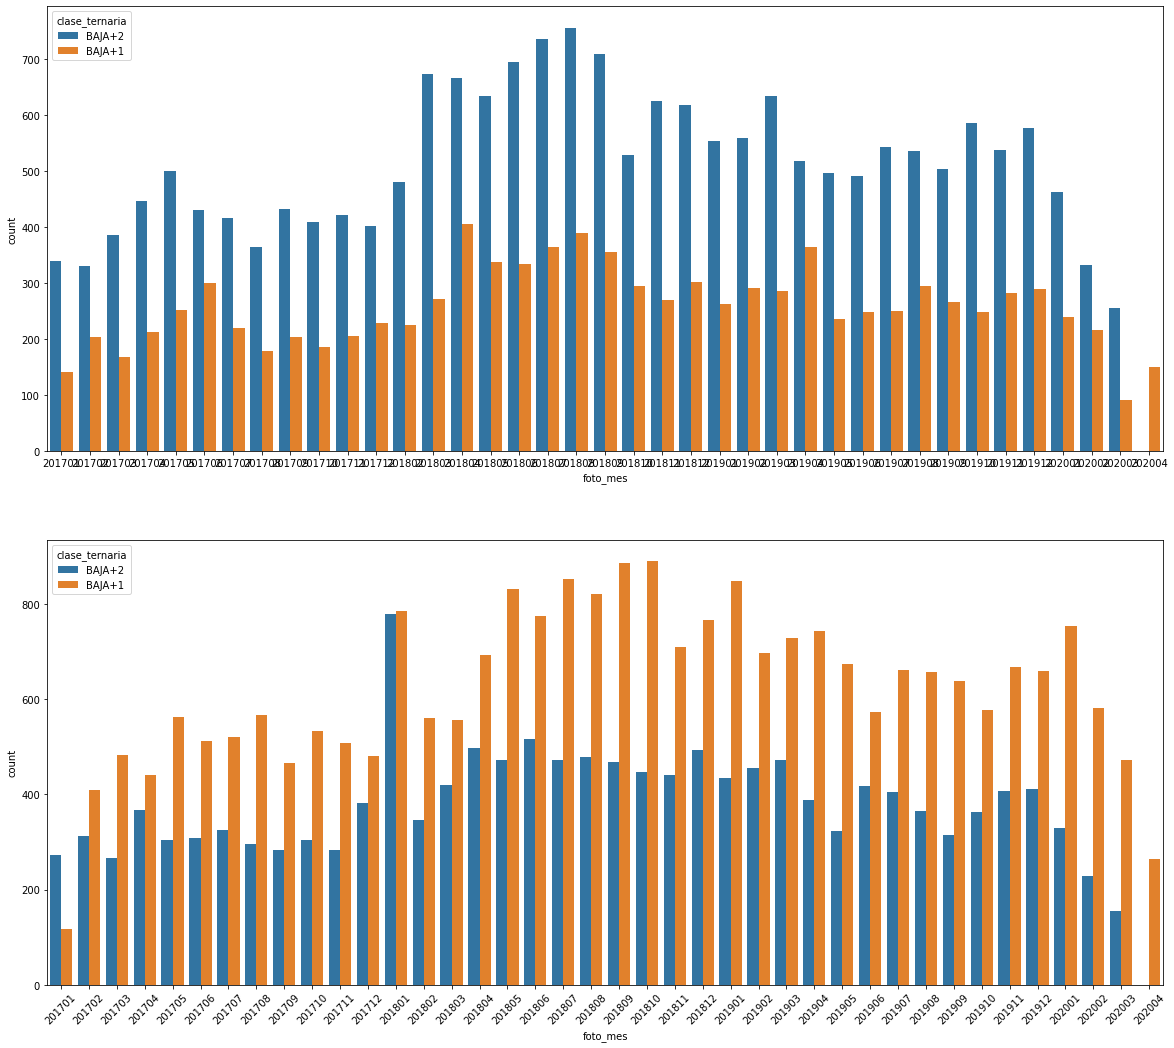

In [ ]:
fig, ax = plt.subplots(nrows=2, figsize=(20, 18))
plt.xticks(rotation=45)

sns.countplot(x="foto_mes",
              hue="clase_ternaria",
              data=frame[(f.internet == 1) & ((f.clase_ternaria == 'BAJA+2') | (f.clase_ternaria == 'BAJA+1')), ['foto_mes', 'clase_ternaria']].to_pandas(),
              ax=ax[0])
sns.countplot(x="foto_mes",
              hue="clase_ternaria",
              data=frame[(f.internet == 0) & ((f.clase_ternaria == 'BAJA+2') | (f.clase_ternaria == 'BAJA+1')), ['foto_mes', 'clase_ternaria']].to_pandas(),
              ax=ax[1])

## mrentabilidad

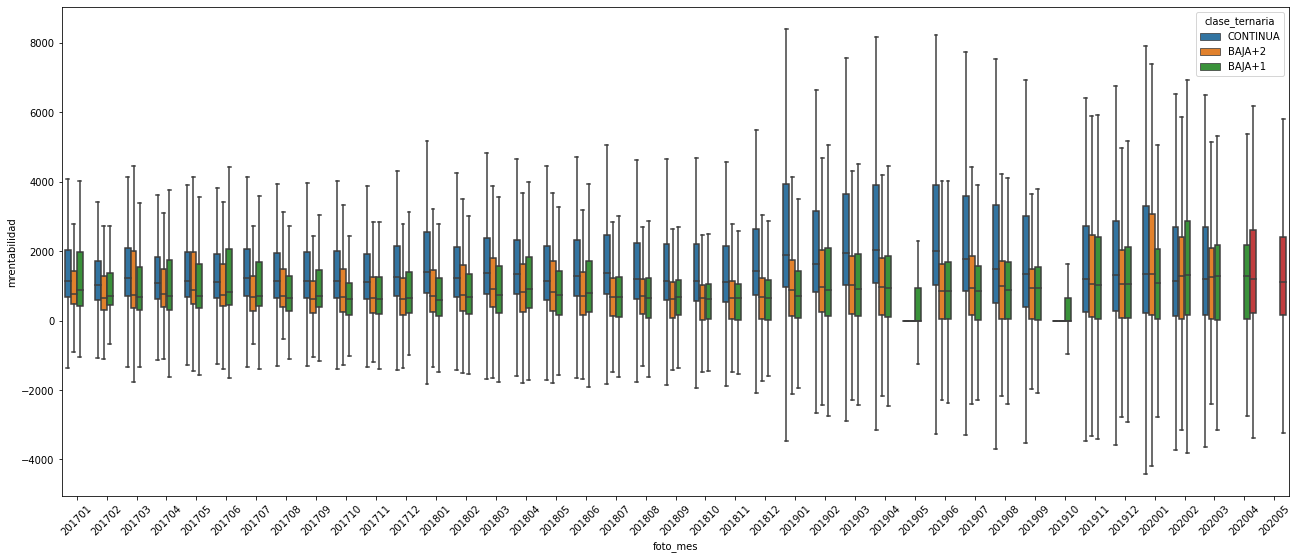

In [ ]:
plt.figure(figsize=(22, 9))
plt.xticks(rotation=45)

sns.boxplot(x="foto_mes", y="mrentabilidad",
            hue="clase_ternaria",
            data=frame[:, ['foto_mes', 'mrentabilidad', 'clase_ternaria']].to_pandas(), showfliers=False)

## mcomisiones

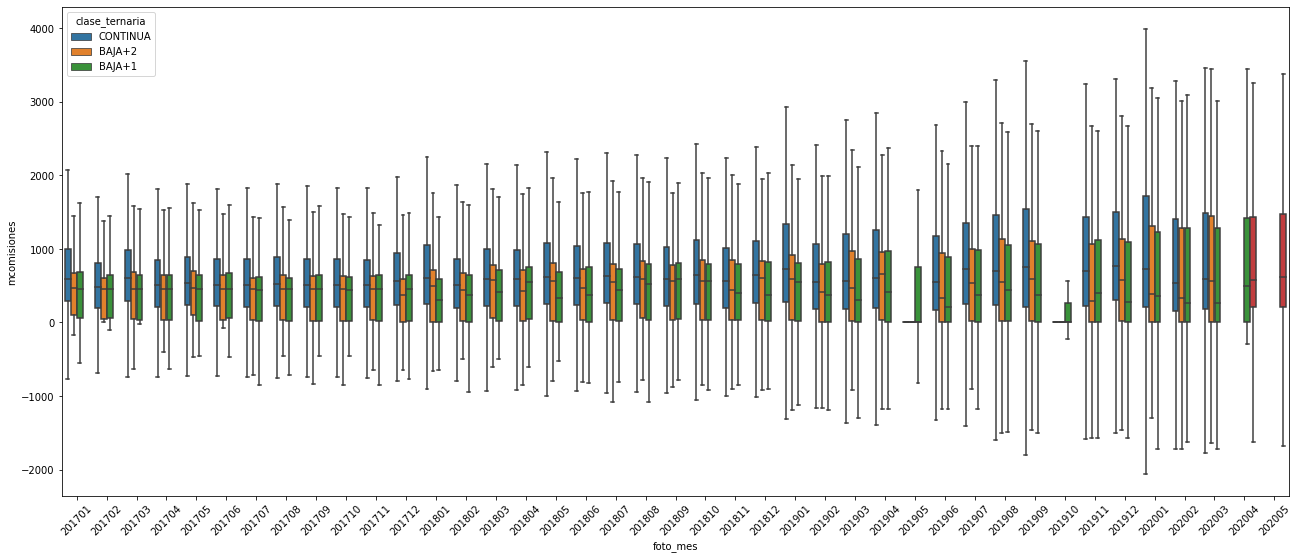

In [ ]:
plt.figure(figsize=(22, 9))
plt.xticks(rotation=45)

sns.boxplot(x="foto_mes", y="mcomisiones",
            hue="clase_ternaria",
            data=frame[:, ['foto_mes', 'mcomisiones', 'clase_ternaria']].to_pandas(), showfliers=False)

## cliente_edad

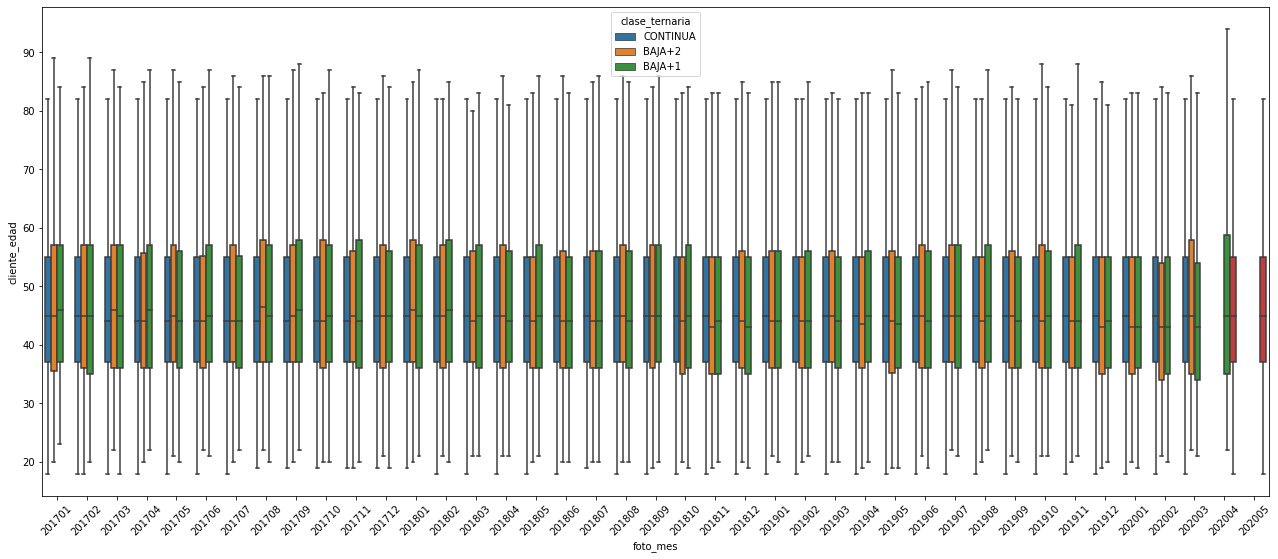

In [ ]:
plt.figure(figsize=(22, 9))
plt.xticks(rotation=45)

sns.boxplot(x="foto_mes", y="cliente_edad",
            hue="clase_ternaria",
            data=frame[:, ['foto_mes', 'cliente_edad', 'clase_ternaria']].to_pandas(), showfliers=False)

## mpayroll

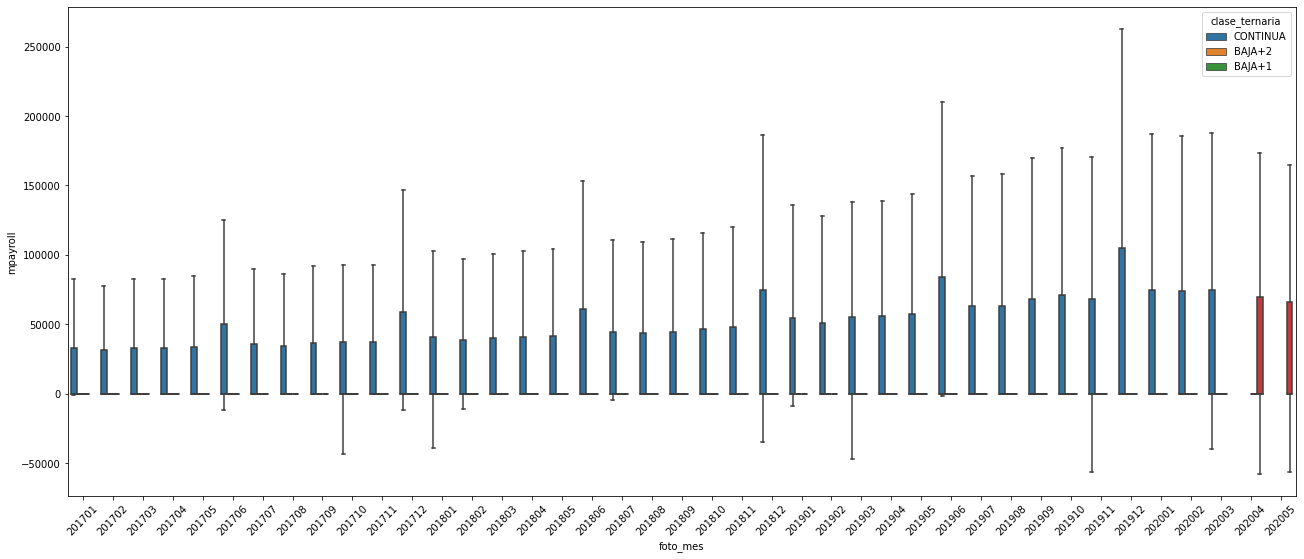

In [ ]:
plt.figure(figsize=(22, 9))
plt.xticks(rotation=45)

sns.boxplot(x="foto_mes", y="mpayroll",
            hue="clase_ternaria",
            data=frame[:, ['foto_mes', 'mpayroll', 'clase_ternaria']].to_pandas(), showfliers=False)

## ccajas_consultas

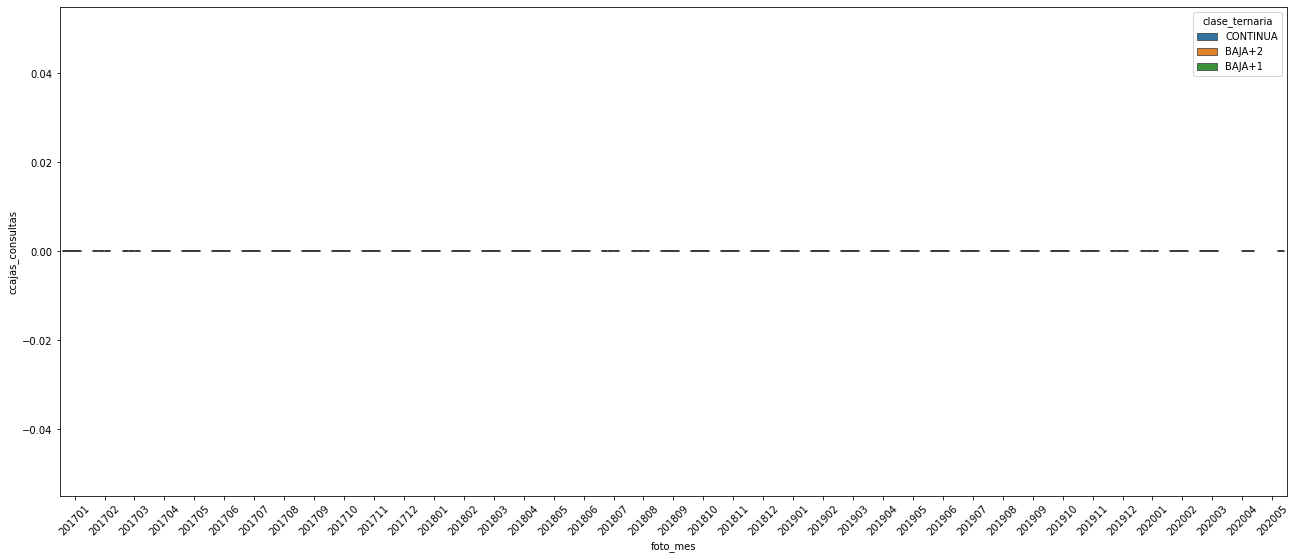

In [ ]:
plt.figure(figsize=(22, 9))
plt.xticks(rotation=45)

sns.boxplot(x="foto_mes", y="ccajas_consultas",
            hue="clase_ternaria",
            data=frame[:, ['foto_mes', 'ccajas_consultas', 'clase_ternaria']].to_pandas(), showfliers=False)